<a href="https://colab.research.google.com/github/Yan-Lopes/Customer_Analysis/blob/main/Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df_raw=pd.read_csv("/content/drive/MyDrive/case_elo7.csv",sep=";")

In [ ]:
df_raw.head()

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco
0,8DE8B7,822945,55498,01/01/2017,papel-e-cia,etiquetas-personalizadas,1,36
1,8DE8E2,8527FA,59E00,01/01/2017,decoracao,adesivos-de-parede,1,"45,9"
2,8DE5BF,7805CB,CEBB5,01/01/2017,lembrancinhas,brinde-corporativo,7,"3,5"
3,8DE7A8,796DE2,E3E11,01/01/2017,bijuterias,colar,1,35
4,8DE2F9,7041AF,FFD39,01/01/2017,papel-e-cia,risque-e-rabisque,1,12


In [ ]:
df_raw.shape

(99644, 8)

In [ ]:
df_raw.dtypes

order_id       object
product_id     object
buyer_id       object
order_date     object
category       object
subcategory    object
quantidade      int64
preco          object
dtype: object

In [ ]:
#Não há valores ausentes, mas existem outliers
df_raw["quantidade"].describe()

count    99644.000000
mean        15.162990
std         35.274269
min          1.000000
25%          1.000000
50%          1.000000
75%         15.000000
max        900.000000
Name: quantidade, dtype: float64

In [ ]:
df_raw_quant=df_raw.loc[df_raw["quantidade"]<=0]

In [ ]:
df_raw.tail()

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco
99639,18EDDB1,C24909,AB74F0,31/12/2019,bebe,lembrancinhas-de-maternidade,20,"3,19"
99640,18EE42F,85E7BD,ABFB6D,31/12/2019,roupas,chinelos,1,"47,5"
99641,18EECD5,D01AF9,AC62DE,31/12/2019,roupas,lingerie,1,"58,5"
99642,18EE4F7,1116BF8,ACA0D3,31/12/2019,roupas,blusa,1,69
99643,18EE995,FAE833,ACA248,31/12/2019,infantil,fantasia-infantil,1,"140,3"


In [ ]:
df_raw['preco']=df_raw['preco'].replace(",",".")

In [ ]:
#Aniversario e festas é a categoria que mais aparece. Existem valores nulos que precisam ser limpados.
df_raw["category"].value_counts()/df_raw.shape[0]

aniversario-e-festas       0.179228
lembrancinhas              0.141273
decoracao                  0.093182
bebe                       0.079202
casamento                  0.069427
roupas                     0.043364
papel-e-cia                0.041136
infantil                   0.041016
convites                   0.029666
festas                     0.026815
casa                       0.026685
acessorios                 0.019911
papel-e-scrapbooking       0.019028
armarinho                  0.017522
bijuterias                 0.016910
tecnicas-de-artesanato     0.014441
joias                      0.013107
religiosos                 0.012856
saude-e-beleza             0.012464
bijuterias-e-acessorios    0.012053
patchwork-e-costura        0.010999
bolsas-e-carteiras         0.010096
pets                       0.009343
jogos-e-brinquedos         0.008982
doces                      0.008902
aulas-e-cursos             0.007988
embalagens-diversas        0.007547
biscuit-e-modelagem        0

In [ ]:
#lembrancinhas-de-aniversario-infantil é o que mais vende.
df_raw["subcategory"].value_counts()/df_raw.shape[0]

lembrancinhas-de-aniversario-infantil    0.045753
outra-sub-categoria                      0.032425
decoracao-de-festa-infantil              0.027588
lembrancinhas-personalizadas             0.026966
lembrancinhas-de-aniversario             0.025611
                                           ...   
enxoval-de-bebe                          0.000010
estandarte                               0.000010
elastico-para-cabelo-infantil            0.000010
peso-de-porta-infantil                   0.000010
cabaca                                   0.000010
Name: subcategory, Length: 758, dtype: float64

In [ ]:
#Limpando valores nulos de categorias e subcategorias
df_raw.dropna(subset=["category"],inplace=True)
df_raw.dropna(subset=["subcategory"],inplace=True)

In [ ]:
#Limpando a string NULL
df_raw=df_raw.loc[df_raw["category"]!="[NULL]"]
df_raw=df_raw.loc[df_raw["subcategory"]!="[NULL]"]

In [ ]:
df_raw.head()

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco
0,8DE8B7,822945,55498,01/01/2017,papel-e-cia,etiquetas-personalizadas,1,36
1,8DE8E2,8527FA,59E00,01/01/2017,decoracao,adesivos-de-parede,1,"45,9"
2,8DE5BF,7805CB,CEBB5,01/01/2017,lembrancinhas,brinde-corporativo,7,"3,5"
3,8DE7A8,796DE2,E3E11,01/01/2017,bijuterias,colar,1,35
4,8DE2F9,7041AF,FFD39,01/01/2017,papel-e-cia,risque-e-rabisque,1,12


In [ ]:
df_split = df_raw["preco"].str.split(",")
data = df_split.to_list()
names = ["P1", "P2"]
new_df = pd.DataFrame(data, columns=names)

In [ ]:
new_df.head()

,P1,P2
0,36,None
1,45,9
2,3,5
3,35,None
4,12,None


In [ ]:
df_raw["P1"]=new_df['P1']
df_raw["P2"]=new_df['P2']

In [ ]:
df_raw.head()

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco,P1,P2
0,8DE8B7,822945,55498,01/01/2017,papel-e-cia,etiquetas-personalizadas,1,36,36,None
1,8DE8E2,8527FA,59E00,01/01/2017,decoracao,adesivos-de-parede,1,"45,9",45,9
2,8DE5BF,7805CB,CEBB5,01/01/2017,lembrancinhas,brinde-corporativo,7,"3,5",3,5
3,8DE7A8,796DE2,E3E11,01/01/2017,bijuterias,colar,1,35,35,None
4,8DE2F9,7041AF,FFD39,01/01/2017,papel-e-cia,risque-e-rabisque,1,12,12,None


In [ ]:
df_raw["P2"].fillna("0", inplace=True)

In [ ]:
df_raw['preco_novo']=df_raw['P1']+"."+df_raw['P2']

In [ ]:
df_raw["preco_novo"]=df_raw["preco_novo"].astype("float")

In [ ]:
df_raw.dtypes

order_id        object
product_id      object
buyer_id        object
order_date      object
category        object
subcategory     object
quantidade       int64
preco           object
P1              object
P2              object
preco_novo     float64
dtype: object

In [ ]:
df_raw["faturamento"]=df_raw["quantidade"]*df_raw["preco_novo"]

In [ ]:
df_raw.head()

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco,P1,P2,preco_novo,faturamento
0,8DE8B7,822945,55498,01/01/2017,papel-e-cia,etiquetas-personalizadas,1,36,36,0,36.0,36.0
1,8DE8E2,8527FA,59E00,01/01/2017,decoracao,adesivos-de-parede,1,"45,9",45,9,45.9,45.9
2,8DE5BF,7805CB,CEBB5,01/01/2017,lembrancinhas,brinde-corporativo,7,"3,5",3,5,3.5,24.5
3,8DE7A8,796DE2,E3E11,01/01/2017,bijuterias,colar,1,35,35,0,35.0,35.0
4,8DE2F9,7041AF,FFD39,01/01/2017,papel-e-cia,risque-e-rabisque,1,12,12,0,12.0,12.0


In [ ]:
df_raw.shape

(97586, 12)

In [ ]:
from datetime import datetime

In [ ]:
df_raw["data"]=pd.to_datetime(df_raw["order_date"])

In [ ]:
df_raw.dtypes

order_id               object
product_id             object
buyer_id               object
order_date             object
category               object
subcategory            object
quantidade              int64
preco                  object
P1                     object
P2                     object
preco_novo            float64
faturamento           float64
data           datetime64[ns]
dtype: object

In [ ]:
df_raw.head()

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco,P1,P2,preco_novo,faturamento,data
0,8DE8B7,822945,55498,01/01/2017,papel-e-cia,etiquetas-personalizadas,1,36,36,0,36.0,36.0,2017-01-01
1,8DE8E2,8527FA,59E00,01/01/2017,decoracao,adesivos-de-parede,1,"45,9",45,9,45.9,45.9,2017-01-01
2,8DE5BF,7805CB,CEBB5,01/01/2017,lembrancinhas,brinde-corporativo,7,"3,5",3,5,3.5,24.5,2017-01-01
3,8DE7A8,796DE2,E3E11,01/01/2017,bijuterias,colar,1,35,35,0,35.0,35.0,2017-01-01
4,8DE2F9,7041AF,FFD39,01/01/2017,papel-e-cia,risque-e-rabisque,1,12,12,0,12.0,12.0,2017-01-01


In [ ]:
df_trusted=pd.DataFrame(df_raw,columns=["order_id","product_id","buyer_id","data","category","subcategory","quantidade","preco_novo","faturamento"])

In [ ]:
df_trusted.head()

,order_id,product_id,buyer_id,data,category,subcategory,quantidade,preco_novo,faturamento
0,8DE8B7,822945,55498,2017-01-01,papel-e-cia,etiquetas-personalizadas,1,36.0,36.0
1,8DE8E2,8527FA,59E00,2017-01-01,decoracao,adesivos-de-parede,1,45.9,45.9
2,8DE5BF,7805CB,CEBB5,2017-01-01,lembrancinhas,brinde-corporativo,7,3.5,24.5
3,8DE7A8,796DE2,E3E11,2017-01-01,bijuterias,colar,1,35.0,35.0
4,8DE2F9,7041AF,FFD39,2017-01-01,papel-e-cia,risque-e-rabisque,1,12.0,12.0


In [ ]:
df_trusted["faturamento"].describe()

count     95576.000000
mean        725.162175
std        3933.440277
min           0.010000
25%           7.700000
50%          42.500000
75%         198.000000
max      422500.000000
Name: faturamento, dtype: float64

In [ ]:
#Separando os faturamentos acima de 800,00
df_trusted_faturamento_alto=df_trusted.loc[df_trusted["faturamento"]>=800]

In [ ]:
df_trusted_faturamento_alto.head()

,order_id,product_id,buyer_id,data,category,subcategory,quantidade,preco_novo,faturamento
41,8E0919,75D1EE,1E5890,2017-02-01,casamento,convites-de-casamento,30,37.6,1128.0
51,8E0EE1,81DA79,3A2F36,2017-02-01,aniversario-e-festas,convites-de-aniversario-infantil,35,60.0,2100.0
52,8DFD9C,202FBD,4067B4,2017-02-01,aniversario-e-festas,lembrancinhas-de-aniversario-infantil,70,20.0,1400.0
81,8DF7B6,7CFCB7,52C8B8,2017-02-01,casamento,noivinhos,110,42.0,4620.0
89,8E086A,7E224E,52CF61,2017-02-01,papel-e-cia,embalagem,40,20.0,800.0


In [ ]:
#Os faturamentos altos estão concentrados nas lembrancinhas e aniversario-e-festas
df_trusted_faturamento_alto["category"].value_counts()/df_trusted_faturamento_alto.shape[0]

lembrancinhas              0.349815
aniversario-e-festas       0.295731
casamento                  0.096376
convites                   0.064460
papel-e-cia                0.039069
bebe                       0.028221
festas                     0.024841
decoracao                  0.012813
doces                      0.012499
infantil                   0.012027
embalagens-diversas        0.009119
acessorios                 0.007704
casa                       0.005267
mdf-e-madeira              0.004874
roupas                     0.004795
religiosos                 0.003931
bolsas-e-carteiras         0.003695
armarinho                  0.003537
tecnicas-de-artesanato     0.003537
bijuterias-e-acessorios    0.002673
eco                        0.002673
patchwork-e-costura        0.001965
bijuterias                 0.001808
papel-e-scrapbooking       0.001651
jogos-e-brinquedos         0.001651
saude-e-beleza             0.001258
biscuit-e-modelagem        0.000707
pets                       0

In [ ]:
#Checando as subcategorias, os maiores faturamentos são concentrados em lembrancinhas para anivesário infantil, personalizadas e de aniversário. Além de convites de casamento e lembrancinhas de casamento.
#Há múltiplos outliers.
df_check=df_trusted_faturamento_alto["subcategory"].value_counts()/df_trusted_faturamento_alto.shape[0]
df_check

lembrancinhas-de-aniversario-infantil    0.115636
lembrancinhas-personalizadas             0.074051
lembrancinhas-de-aniversario             0.064303
convites-de-casamento                    0.058172
lembrancinhas-de-casamento               0.053769
                                           ...   
base                                     0.000079
argila                                   0.000079
colete                                   0.000079
lapela-de-noivo                          0.000079
pulseiras-masculinas                     0.000079
Name: subcategory, Length: 383, dtype: float64

In [ ]:
#Verificando o preço dessa amostra de faturamento alto, podemos perceber que o desvio padrão é alto (R$220)
df_trusted_faturamento_alto["preco_novo"].describe()

count    12721.000000
mean       122.481741
std        220.261630
min          1.200000
25%         37.000000
50%         69.900000
75%        129.970000
max       4400.000000
Name: preco_novo, dtype: float64

In [ ]:
#Portanto, verificaremos os itens com preço acima da média.
df_trusted_preco_alto=df_trusted_faturamento_alto.loc[df_trusted_faturamento_alto["preco_novo"]>=123]

In [ ]:
#Verificamos que os preços altos devem-se a itens personalizados.
#Não interpretaremos os casos como outliers para identificar os perfis de clientes.
#Contudo, limparemos os preços altos em categorias não representativas, deixando apenas lembrancinhas, aniversario-e-festas,casamento e convites, totalizando 80% da base de alto faturamento.  
df_trusted_preco_alto.head()

,order_id,product_id,buyer_id,data,category,subcategory,quantidade,preco_novo,faturamento
104,8E2F6A,85F5D3,167BC5,2017-03-01,lembrancinhas,lembrancinhas-personalizadas,10,299.40,2994.0
115,8E30CA,5DCB8E,30E9B3,2017-03-01,lembrancinhas,caneca-personalizada,30,230.00,6900.0
180,8E532B,5EE10C,216CEE,2017-04-01,lembrancinhas,sacolas-personalizadas,15,150.00,2250.0
241,8E61B1,5A3E21,52F3C9,2017-04-01,lembrancinhas,lembrancinhas-de-casamento,14,145.00,2030.0
367,8EBD9A,6208F6,4EBA06,2017-06-01,aniversario-e-festas,convites-de-aniversario-infantil,50,209.99,10499.5


In [ ]:
#Criaremos um df com faturamento acima de 800 para excluir as categorias desprezadas.
df_trusted_filtrado_fatu_maior=df_trusted.query('faturamento>=800')

In [ ]:
df_trusted_filtrado_fatu_maior.head()

,order_id,product_id,buyer_id,data,category,subcategory,quantidade,preco_novo,faturamento
41,8E0919,75D1EE,1E5890,2017-02-01,casamento,convites-de-casamento,30,37.6,1128.0
51,8E0EE1,81DA79,3A2F36,2017-02-01,aniversario-e-festas,convites-de-aniversario-infantil,35,60.0,2100.0
52,8DFD9C,202FBD,4067B4,2017-02-01,aniversario-e-festas,lembrancinhas-de-aniversario-infantil,70,20.0,1400.0
81,8DF7B6,7CFCB7,52C8B8,2017-02-01,casamento,noivinhos,110,42.0,4620.0
89,8E086A,7E224E,52CF61,2017-02-01,papel-e-cia,embalagem,40,20.0,800.0


In [ ]:
df_trusted_filtrado_fatu_maior=df_trusted_filtrado_fatu_maior.query('category=="lembrancinhas" or category=="aniversario-e-festas" or category=="casamento" or category=="convites"')

In [ ]:
df_trusted_filtrado_fatu_menor=df_trusted.query('faturamento<800')

In [ ]:
#Concatenando os dfs faturamento maior e menor.
df_trusted_final=pd.concat([df_trusted_filtrado_fatu_maior, df_trusted_filtrado_fatu_menor])

In [ ]:
df_trusted_final.head()

,order_id,product_id,buyer_id,data,category,subcategory,quantidade,preco_novo,faturamento
41,8E0919,75D1EE,1E5890,2017-02-01,casamento,convites-de-casamento,30,37.6,1128.0
51,8E0EE1,81DA79,3A2F36,2017-02-01,aniversario-e-festas,convites-de-aniversario-infantil,35,60.0,2100.0
52,8DFD9C,202FBD,4067B4,2017-02-01,aniversario-e-festas,lembrancinhas-de-aniversario-infantil,70,20.0,1400.0
81,8DF7B6,7CFCB7,52C8B8,2017-02-01,casamento,noivinhos,110,42.0,4620.0
104,8E2F6A,85F5D3,167BC5,2017-03-01,lembrancinhas,lembrancinhas-personalizadas,10,299.4,2994.0


In [ ]:
df_trusted_final['faturamento'].describe()

count     93113.000000
mean        615.939957
std        3520.801325
min           0.010000
25%           7.010000
50%          39.900000
75%         169.900000
max      422500.000000
Name: faturamento, dtype: float64

In [ ]:
df_trusted_final["category"].value_counts()/df_trusted_final.shape[0]

aniversario-e-festas       0.185871
lembrancinhas              0.147960
decoracao                  0.093016
bebe                       0.078700
casamento                  0.072525
roupas                     0.043334
infantil                   0.040650
papel-e-cia                0.036601
convites                   0.031123
casa                       0.026162
festas                     0.023853
papel-e-scrapbooking       0.018526
acessorios                 0.017430
bijuterias                 0.017162
armarinho                  0.015991
tecnicas-de-artesanato     0.014423
joias                      0.013135
religiosos                 0.012598
saude-e-beleza             0.011835
bijuterias-e-acessorios    0.011674
patchwork-e-costura        0.010879
bolsas-e-carteiras         0.009966
pets                       0.009601
jogos-e-brinquedos         0.009129
aulas-e-cursos             0.008270
doces                      0.007550
biscuit-e-modelagem        0.007335
embalagens-diversas        0

In [ ]:
#Agora, verificaremos os menores faturamentos
df_trusted_filtrado_fatu_menor=df_trusted_final.query('faturamento<800')

In [ ]:
#A média ficou em 90,39 - então verificaremos o que está abaixo de 91.
df_trusted_filtrado_fatu_menor['faturamento'].describe()

count    82855.000000
mean        90.399071
std        147.921994
min          0.010000
25%          5.550000
50%         29.990000
75%         99.800000
max        799.980000
Name: faturamento, dtype: float64

In [ ]:
#Agora, verificaremos os faturamentos inferiores a 91
df_trusted_filtrado_fatu_menor=df_trusted_final.query('faturamento<=91')

In [ ]:
#Verificamos que os faturamentos abaixo de 91 estão em aniversario-e-festas, decoracao, bebe, lembrancinhas, casamento, roupas, infantil e papel-e-cia. O restante pode ser interpretado como outliers.
df_trusted_filtrado_fatu_menor["category"].value_counts()/df_trusted_filtrado_fatu_menor.shape[0]

aniversario-e-festas       0.143361
decoracao                  0.116629
bebe                       0.097978
lembrancinhas              0.080211
casamento                  0.061838
roupas                     0.054381
infantil                   0.050202
papel-e-cia                0.042728
casa                       0.032173
festas                     0.026650
papel-e-scrapbooking       0.023847
bijuterias                 0.021995
convites                   0.021421
acessorios                 0.021143
armarinho                  0.019569
tecnicas-de-artesanato     0.017848
joias                      0.017242
religiosos                 0.015849
saude-e-beleza             0.014931
bijuterias-e-acessorios    0.014292
patchwork-e-costura        0.012866
pets                       0.012407
bolsas-e-carteiras         0.012178
jogos-e-brinquedos         0.011571
aulas-e-cursos             0.010899
biscuit-e-modelagem        0.009342
doces                      0.008031
mdf-e-madeira              0

In [ ]:
#Agora, vamos verificar as subcategorias.
#Percebemos que não há concentração de subcategorias, sendo a representatividade dispersa.
df_trusted_filtrado_fatu_menor["subcategory"].value_counts()/df_trusted_filtrado_fatu_menor.shape[0]

outra-sub-categoria                      0.037401
decoracao-de-festa-infantil              0.027371
lembrancinhas-de-aniversario-infantil    0.025437
camiseta                                 0.025355
quadro-decorativo                        0.022667
                                           ...   
bisnaga-de-brigadeiro                    0.000016
porta-coleira                            0.000016
espelho                                  0.000016
nylon                                    0.000016
fimo                                     0.000016
Name: subcategory, Length: 741, dtype: float64

In [ ]:
#Vamos deixar a base principal com faturamento acima de 91.
df_trusted_final=df_trusted_final.query('faturamento>91')

In [ ]:
#Vamos filtrar as categorias representativas dos faturamentos menores.
df_trusted_filtrado_fatu_menor=df_trusted_filtrado_fatu_menor.query('category=="aniversario-e-festas" or category=="decoracao" or category=="bebe" or category=="casamento" or category=="lembrancinhas" or category=="roupas" or category=="infantil" or category=="papel-e-cia"')

In [ ]:
df_trusted_filtrado_fatu_menor["category"].value_counts()/df_trusted_filtrado_fatu_menor.shape[0]

aniversario-e-festas    0.221465
decoracao               0.180170
bebe                    0.151357
lembrancinhas           0.123911
casamento               0.095529
roupas                  0.084009
infantil                0.077552
papel-e-cia             0.066007
Name: category, dtype: float64

In [ ]:
#Concatenando os dfs base com faturamento menor off + limpeza faturamento menor
df_trusted_final=pd.concat([df_trusted_final, df_trusted_filtrado_fatu_menor])

In [ ]:
df_trusted_final.shape


(71595, 9)

In [ ]:
#Com a limpeza total da base, foram exluídas 25991 entradas, representando 26,63%.
df_raw.shape

(97586, 13)

In [ ]:
df_trusted_final.head()

,order_id,product_id,buyer_id,data,category,subcategory,quantidade,preco_novo,faturamento
41,8E0919,75D1EE,1E5890,2017-02-01,casamento,convites-de-casamento,30,37.6,1128.0
51,8E0EE1,81DA79,3A2F36,2017-02-01,aniversario-e-festas,convites-de-aniversario-infantil,35,60.0,2100.0
52,8DFD9C,202FBD,4067B4,2017-02-01,aniversario-e-festas,lembrancinhas-de-aniversario-infantil,70,20.0,1400.0
81,8DF7B6,7CFCB7,52C8B8,2017-02-01,casamento,noivinhos,110,42.0,4620.0
104,8E2F6A,85F5D3,167BC5,2017-03-01,lembrancinhas,lembrancinhas-personalizadas,10,299.4,2994.0


In [ ]:
#Analisando o preço unitário, verificamos que o desvio é alto.
df_trusted_final['preco_novo'].describe()

count    71595.000000
mean        50.328203
std         95.435602
min          0.010000
25%          3.490000
50%         19.500000
75%         60.000000
max       4400.000000
Name: preco_novo, dtype: float64

In [ ]:
#No primeiro momento, verificaremos os preços inferiores a mediana de 19,50 - uma vez que preços inferiores a média de 50,32 representa 71% do df. Ao testar esse filtro, foi verificado que representaria 51% do df - o que ainda é muito. Assim, foi verificado que preços abaixo de R$ 0,50 representavam 3% do df.
df_trusted_preco_menor=df_trusted_final.query('preco_novo<0.50')

In [ ]:
#Agora, verificaremos a concentração de itens com preços baixos
df_trusted_preco_menor.shape

(2225, 9)

In [ ]:
df_trusted_preco_menor["category"].value_counts()/df_trusted_preco_menor.shape[0]

aniversario-e-festas    0.251236
lembrancinhas           0.200000
decoracao               0.136629
bebe                    0.121348
casamento               0.104270
infantil                0.065618
papel-e-cia             0.061573
roupas                  0.056629
doces                   0.001798
convites                0.000449
mdf-e-madeira           0.000449
Name: category, dtype: float64

In [ ]:
df_trusted_preco_menor.head()

,order_id,product_id,buyer_id,data,category,subcategory,quantidade,preco_novo,faturamento
27914,CABC35,7D5163,516216,2017-10-31,aniversario-e-festas,bala-personalizada,400,0.30,120.00
33120,D56618,8F0712,6CBF95,2017-12-31,convites,convites-de-casamento,250,0.40,100.00
40882,E6C708,9AA442,72D99D,2018-03-25,doces,forminhas-para-doces,600,0.40,240.00
42775,EB6CD9,B69574,737DE7,2018-04-17,aniversario-e-festas,forminhas-para-doces,400,0.45,180.00
47343,F5FE33,C3E884,787541,2018-06-13,mdf-e-madeira,caixa,461,0.48,221.28


In [ ]:
#Contudo, não basta limpar a base - uma vez que temos registro de compras em grandes quantidades. Assim, faremos a limpeza utilizando a média da quantidade como corte 18.
df_trusted_preco_menor.describe()

,quantidade,preco_novo,faturamento
count,2225.000000,2225.000000,2225.000000
mean,18.906067,0.297169,5.695209
std,41.412284,0.112807,14.355612
min,1.000000,0.010000,0.010000
25%,1.000000,0.200000,0.300000
50%,1.000000,0.300000,0.470000
75%,20.000000,0.390000,5.850000
max,600.000000,0.490000,240.000000


In [ ]:
df_trusted_preco_menor=df_trusted_preco_menor.query('quantidade>18')

In [ ]:
#Agora, faremos a limpeza de preço menor que R$0,50 na base principal
df_trusted_final=df_trusted_final.query('preco_novo>=0.50')

In [ ]:
#Concatenando os dfs base com preço menor + base principal limpa
df_trusted_final=pd.concat([df_trusted_final, df_trusted_preco_menor])

In [ ]:
#Assim, foram perdidas 153 entradas - totalizando 3% em relação ao último filtro.
df_trusted_final.shape

(70032, 9)

In [ ]:
df_trusted_final['faturamento'].describe()

count     70032.000000
mean        812.056148
std        4040.570574
min           0.250000
25%          13.990000
50%          70.000000
75%         299.900000
max      422500.000000
Name: faturamento, dtype: float64

In [ ]:
df_trusted_final['preco_novo'].describe()

count    70032.000000
mean        51.444781
std         96.198347
min          0.010000
25%          3.800000
50%         19.990000
75%         63.000000
max       4400.000000
Name: preco_novo, dtype: float64

In [ ]:
#Ainda verificamos que existem faturamentos baixos, o que sugere preços e quantidades baixas
#Vamos fazer uma análise dos faturamentos abaixo de R$ 2 (um pouco menor que os 25%)
df_trusted_faturamento_8=df_trusted_final.query('faturamento<=2')

In [ ]:
#Dada a baixa representatividade de 5%, optamos por excluir da base.
df_trusted_faturamento_8.shape

(5458, 9)

In [ ]:
df_trusted_final=df_trusted_final.query('faturamento>2')

In [ ]:
#O preço mínimo sai do 0,01 para 0,05.
df_trusted_final['preco_novo'].describe()

count    64574.000000
mean        55.681531
std         99.025152
min          0.050000
25%          5.800000
50%         24.990000
75%         69.900000
max       4400.000000
Name: preco_novo, dtype: float64

In [ ]:
df_trusted_final['faturamento'].describe()

count     64574.000000
mean        880.579650
std        4200.705457
min           2.010000
25%          22.312500
50%          90.000000
75%         355.037500
max      422500.000000
Name: faturamento, dtype: float64

In [ ]:
#Ainda verificamos que existem faturamentos altos, o que sugere preços e quantidades altas
#Vamos fazer uma análise dos preços acima de R$ 250 (o que representa 3% de exclusão da base.
df_trusted_preco_250=df_trusted_final.query('preco_novo>=250')

In [ ]:
df_trusted_final=df_trusted_final.query('preco_novo<250')

In [ ]:
#A mediana de preço sai de 25 para 23. O desvio de 99 para 52.
df_trusted_final['preco_novo'].describe()

count    62617.000000
mean        43.858565
std         51.968781
min          0.050000
25%          5.400000
50%         23.000000
75%         61.320000
max        249.990000
Name: preco_novo, dtype: float64

In [ ]:
df_trusted_final['faturamento'].describe()

count    62617.000000
mean       688.142999
std       2325.849184
min          2.010000
25%         20.590000
50%         83.700000
75%        306.000000
max      60000.000000
Name: faturamento, dtype: float64

In [ ]:
df_trusted_final.shape

(62617, 9)

In [ ]:
#Ainda verificamos que existem faturamentos altos, o que sugere preços e quantidades altas
#Como o faturamento depende de quantidade e preço, tomaremos cuidado para não limpar em excesso. Assim, limpando o faturamento acima de R$5000 ocorreria em perda de 3% da base.
df_trusted_fat_5000=df_trusted_final.query('faturamento>=5000')

In [ ]:
df_trusted_fat_5000.shape

(1950, 9)

In [ ]:
#Montaremos um df para verificar se temos quantidade comprada muito baixa para um faturamento muito alto.
df_trusted_fat_1000=df_trusted_final.query('faturamento>=1000')

In [ ]:
#Percebe-se que os resultados são aceitáveis ao ponto que temos o mínimo de 5 produtos para um faturamento acima de R$ 1000,00 que daria R$ 200,00 por produto e o máximo de 800 produtos, que daria R$1,25 por produto.
df_trusted_fat_1000['quantidade'].describe()

count    8498.000000
mean       63.155213
std        63.431641
min         5.000000
25%        30.000000
50%        46.000000
75%        80.000000
max       800.000000
Name: quantidade, dtype: float64

In [ ]:
df_trusted_final=df_trusted_final.query('faturamento<5000')

In [ ]:
#Ao total, foram excluídas do banco para a modelagem 36919 entradas, o que representa 37,83% do banco.
df_trusted_final.shape

(60667, 9)

In [ ]:
df_trusted_final.head()

,order_id,product_id,buyer_id,data,category,subcategory,quantidade,preco_novo,faturamento
41,8E0919,75D1EE,1E5890,2017-02-01,casamento,convites-de-casamento,30,37.6,1128.0
51,8E0EE1,81DA79,3A2F36,2017-02-01,aniversario-e-festas,convites-de-aniversario-infantil,35,60.0,2100.0
52,8DFD9C,202FBD,4067B4,2017-02-01,aniversario-e-festas,lembrancinhas-de-aniversario-infantil,70,20.0,1400.0
81,8DF7B6,7CFCB7,52C8B8,2017-02-01,casamento,noivinhos,110,42.0,4620.0
118,8E169B,55904C,393592,2017-03-01,lembrancinhas,rotulos-personalizados,10,80.0,800.0


In [ ]:
#A maior representatividade das transações são: aniversario-e-festas, lembrancinhas, decoracao, bebe e casamento. 
df_trusted_final["category"].value_counts()/df_trusted_final.shape[0]

aniversario-e-festas       0.247383
lembrancinhas              0.198856
decoracao                  0.116604
bebe                       0.098126
casamento                  0.092159
roupas                     0.054115
infantil                   0.050637
papel-e-cia                0.046846
convites                   0.021198
festas                     0.009346
casa                       0.007187
acessorios                 0.005143
armarinho                  0.004451
papel-e-scrapbooking       0.003725
tecnicas-de-artesanato     0.003659
bijuterias                 0.003643
patchwork-e-costura        0.003412
doces                      0.003379
bijuterias-e-acessorios    0.003231
religiosos                 0.003082
embalagens-diversas        0.003033
saude-e-beleza             0.002769
bolsas-e-carteiras         0.002687
joias                      0.002473
mdf-e-madeira              0.002308
jogos-e-brinquedos         0.002126
pets                       0.002044
biscuit-e-modelagem        0

In [ ]:
#Por subcategoria, a maior representatividade está em lembrancinhas-de-aniversario-infantil, lembrancinhas-personalizadas, decoracao-de-festa-infantil, lembrancinhas-de-aniversario e lembrancinhas-de-casamento
df_trusted_final["subcategory"].value_counts()/df_trusted_final.shape[0]

lembrancinhas-de-aniversario-infantil    0.067747
lembrancinhas-personalizadas             0.038242
decoracao-de-festa-infantil              0.037318
lembrancinhas-de-aniversario             0.037022
lembrancinhas-de-casamento               0.028516
                                           ...   
festa-de-boteco                          0.000016
entretela                                0.000016
tela                                     0.000016
iglu                                     0.000016
arame                                    0.000016
Name: subcategory, Length: 667, dtype: float64

In [ ]:
df_categoria_quantidade = df_trusted_final.groupby(['category']).agg( 
    Soma_Quant=('quantidade', 'sum'), Média_Quant=('quantidade', 'mean'),Faturamento_Sum=('faturamento', 'sum'),Média_Preco=('preco_novo', 'mean'))
df_categoria_quantidade["Média_Quant"]=round(df_categoria_quantidade["Média_Quant"],2)
df_categoria_quantidade["Média_Preco"]=round(df_categoria_quantidade["Média_Preco"],2)
df_categoria_quantidade["Faturamento_Sum"]=round(df_categoria_quantidade["Faturamento_Sum"],0)

In [ ]:
#Pela ótica da soma da quantidade, o maior volume de compra é de lembrancinhas, aniversario-e-festas, casamento e convites.
df_categoria_quantidade.sort_values(by='Soma_Quant',ascending=False)

,Soma_Quant,Média_Quant,Faturamento_Sum,Média_Preco
category,,,,
lembrancinhas,383435,31.78,8601205.0,31.39
aniversario-e-festas,313876,20.91,7761028.0,35.72
casamento,127059,22.73,2253998.0,34.86
convites,69187,53.80,1450338.0,40.20
papel-e-cia,27509,9.68,255879.0,34.78
bebe,23408,3.93,386715.0,40.31
decoracao,14331,2.03,432207.0,41.41
infantil,11749,3.82,202341.0,41.17
festas,10010,17.65,150303.0,69.88


In [ ]:
#Pela ótica da soma do faturamento, o produto que mais fatura é lembrancinhas, aniversario-e-festas, casamento e convites.
df_categoria_quantidade.sort_values(by='Faturamento_Sum',ascending=False)

,Soma_Quant,Média_Quant,Faturamento_Sum,Média_Preco
category,,,,
lembrancinhas,383435,31.78,8601205.0,31.39
aniversario-e-festas,313876,20.91,7761028.0,35.72
casamento,127059,22.73,2253998.0,34.86
convites,69187,53.80,1450338.0,40.20
decoracao,14331,2.03,432207.0,41.41
bebe,23408,3.93,386715.0,40.31
papel-e-cia,27509,9.68,255879.0,34.78
infantil,11749,3.82,202341.0,41.17
roupas,6010,1.83,183015.0,44.41


In [ ]:
#Pela ótica do preço, os produtos mais caros são: macrame, saboaria, joias e aulas-e-cursos, com quantidade média entre R$1,14 e R$2.
df_categoria_quantidade.sort_values(by='Média_Preco',ascending=False)

,Soma_Quant,Média_Quant,Faturamento_Sum,Média_Preco
category,,,,
macrame,14,2.00,1884.0,149.23
saboaria,22,1.69,2790.0,140.85
joias,173,1.15,23386.0,139.41
aulas-e-cursos,103,1.14,13108.0,135.21
biscuit-e-modelagem,140,1.46,15027.0,131.25
bijuterias,833,3.77,40853.0,125.68
bordado,75,2.88,5980.0,124.55
papel-e-scrapbooking,1153,5.10,40419.0,121.71
pintura-em-tecido,34,1.70,2956.0,121.66


In [ ]:
df_trusted_final.head()

,order_id,product_id,buyer_id,data,category,subcategory,quantidade,preco_novo,faturamento
41,8E0919,75D1EE,1E5890,2017-02-01,casamento,convites-de-casamento,30,37.6,1128.0
51,8E0EE1,81DA79,3A2F36,2017-02-01,aniversario-e-festas,convites-de-aniversario-infantil,35,60.0,2100.0
52,8DFD9C,202FBD,4067B4,2017-02-01,aniversario-e-festas,lembrancinhas-de-aniversario-infantil,70,20.0,1400.0
81,8DF7B6,7CFCB7,52C8B8,2017-02-01,casamento,noivinhos,110,42.0,4620.0
118,8E169B,55904C,393592,2017-03-01,lembrancinhas,rotulos-personalizados,10,80.0,800.0


In [ ]:
#Feita as limpezas dos dados, vamos empregar a metodologia RFM para segmentar os clientes.
#Primeiramente, calcularemos a recência para clientes que fizeram uma compra com uma empresa.
df_recency = df_trusted_final.groupby(by='buyer_id',
                        as_index=False)['data'].max()
df_recency.columns = ['buyer_id', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,buyer_id,LastPurchaseDate,Recency
0,10044F,2017-05-06,949
1,1007D2,2018-03-06,645
2,1008C4,2017-12-16,725
3,100933,2018-10-05,432
4,1009CA,2018-05-07,583


In [ ]:
#Agora, calcularemos a frequência de compra
frequency_df = df_trusted_final.drop_duplicates().groupby(
    by=['buyer_id'], as_index=False)['data'].count()
frequency_df.columns = ['buyer_id', 'Frequency']
frequency_df.head()

,buyer_id,Frequency
0,10044F,2
1,1007D2,2
2,1008C4,1
3,100933,2
4,1009CA,5


In [ ]:
#E o valor monetário
df_trusted_final["faturamento"]
monetary_df = df_trusted_final.groupby(by='buyer_id', as_index=False)['faturamento'].sum()
monetary_df.columns = ['buyer_id', 'Monetary']
monetary_df.head()

,buyer_id,Monetary
0,10044F,2198.00
1,1007D2,79.89
2,1008C4,23.00
3,100933,219.00
4,1009CA,3545.70


In [ ]:
#Vamos mergear os indicadores criados pelo código do cliente.
rf_df = df_recency.merge(frequency_df, on='buyer_id')
rfm_df = rf_df.merge(monetary_df, on='buyer_id').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,buyer_id,Recency,Frequency,Monetary
0,10044F,949,2,2198.00
1,1007D2,645,2,79.89
2,1008C4,725,1,23.00
3,100933,432,2,219.00
4,1009CA,583,5,3545.70


In [ ]:
#Normalizando os indicadores:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,buyer_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,10044F,949,2,2198.00,7.880150,61.766537,61.766537
1,1007D2,645,2,79.89,32.243834,61.766537,61.766537
2,1008C4,725,1,23.00,26.503870,23.613341,23.613341
3,100933,432,2,219.00,50.454277,61.766537,61.766537
4,1009CA,583,5,3545.70,37.158882,96.194673,96.194673


In [ ]:
#Agora, calcularemos o score RFM - sendo o peso 15% para a recência, 52% pela frequência e 33% pelo valor monetário
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.52 * \
    rfm_df['F_rank_norm']+0.33*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['buyer_id', 'RFM_Score']].head(7)

,buyer_id,RFM_Score
0,10044F,2.68
1,1007D2,2.87
2,1008C4,1.20
3,100933,3.00
4,1009CA,4.37
5,101209,4.20
6,10122A,1.18


In [ ]:
#Para segmentar os clientes, foi utilizada a referência da metodologia RFM, tal que:
#rfm score >4.5 : Cliente Top
#4.5 <   rfm score > 4 : Cliente Alto Valor
#4>rfm score >3 : Cliente Medio Valor
#3>rfm score>1.6 : Cliente Baixo Valor
#rfm score<1.6 :Cliente Perdido
import numpy as np
rfm_df["Segmento_Cliente"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Cliente Top",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "Cliente Alto Valor",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Cliente Medio Valor",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Cliente Baixo Valor', 'Cliente Perdido'))))))
rfm_df[['buyer_id', 'RFM_Score', 'Segmento_Cliente']].head(20)

,buyer_id,RFM_Score,Segmento_Cliente
0,10044F,2.68,Cliente Baixo Valor
1,1007D2,2.87,Cliente Baixo Valor
2,1008C4,1.20,Cliente Perdido
3,100933,3.00,Cliente Baixo Valor
4,1009CA,4.37,Cliente Alto Valor
5,101209,4.20,Cliente Alto Valor
6,10122A,1.18,Cliente Perdido
7,1012AF,3.85,Cliente Medio Valor
8,1014C9,3.35,Cliente Medio Valor
9,10150D,4.55,Cliente Top


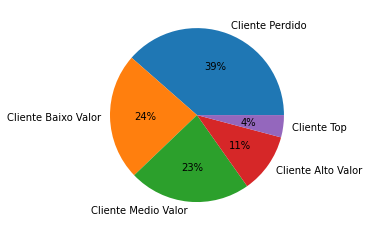

In [ ]:
import matplotlib.pyplot as plt
plt.pie(rfm_df.Segmento_Cliente.value_counts(),
        labels=rfm_df.Segmento_Cliente.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
df_trusted_final_segmentado=pd.merge(df_trusted_final, 
                     rfm_df, 
                     on ='buyer_id', 
                     how ='left')
df_trusted_final_segmentado.head()

,order_id,product_id,buyer_id,data,category,subcategory,quantidade,preco_novo,faturamento,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Segmento_Cliente
0,8E0919,75D1EE,1E5890,2017-02-01,casamento,convites-de-casamento,30,37.6,1128.0,1043,1,1128.00,1.86,23.61,23.61,1.02,Cliente Perdido
1,8E0EE1,81DA79,3A2F36,2017-02-01,aniversario-e-festas,convites-de-aniversario-infantil,35,60.0,2100.0,1043,1,2100.00,1.86,23.61,23.61,1.02,Cliente Perdido
2,8DFD9C,202FBD,4067B4,2017-02-01,aniversario-e-festas,lembrancinhas-de-aniversario-infantil,70,20.0,1400.0,1043,1,1400.00,1.86,23.61,23.61,1.02,Cliente Perdido
3,8DF7B6,7CFCB7,52C8B8,2017-02-01,casamento,noivinhos,110,42.0,4620.0,851,9,5126.55,15.72,99.68,99.68,4.35,Cliente Alto Valor
4,8E169B,55904C,393592,2017-03-01,lembrancinhas,rotulos-personalizados,10,80.0,800.0,112,4,844.09,83.71,91.78,91.78,4.53,Cliente Top


In [ ]:
df_trusted_ClientePerdido=df_trusted_final_segmentado.query('Segmento_Cliente=="Cliente Perdido"')

In [ ]:
df_trusted_ClientePerdido.head()

,order_id,product_id,buyer_id,data,category,subcategory,quantidade,preco_novo,faturamento,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Segmento_Cliente
0,8E0919,75D1EE,1E5890,2017-02-01,casamento,convites-de-casamento,30,37.6,1128.0,1043,1,1128.0,1.86,23.61,23.61,1.02,Cliente Perdido
1,8E0EE1,81DA79,3A2F36,2017-02-01,aniversario-e-festas,convites-de-aniversario-infantil,35,60.0,2100.0,1043,1,2100.0,1.86,23.61,23.61,1.02,Cliente Perdido
2,8DFD9C,202FBD,4067B4,2017-02-01,aniversario-e-festas,lembrancinhas-de-aniversario-infantil,70,20.0,1400.0,1043,1,1400.0,1.86,23.61,23.61,1.02,Cliente Perdido
12,8E5317,7FF6C3,52EC46,2017-04-01,aniversario-e-festas,festa-infantil,20,50.0,1000.0,984,1,1000.0,5.54,23.61,23.61,1.05,Cliente Perdido
15,8E9C12,7CA343,4ABBD7,2017-05-01,lembrancinhas,caneca-personalizada,50,24.9,1245.0,954,1,1245.0,7.44,23.61,23.61,1.06,Cliente Perdido


In [ ]:
#Verificando a frequência, percebe-se que é um cliente de frequência única.
df_trusted_ClientePerdido["Frequency"].describe()

count    11762.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Frequency, dtype: float64

In [ ]:
# plotar o histograma da soma da quantidade
#Percebe-se que esse tipo de cliente não compra em grandes quantidades, o que sugere uma compra para um evento específico. Existe um pequeno grupo que compra em grande quantidade, mas é a minoria.
df_trusted_ClientePerdido["quantidade"].describe()

count    11762.000000
mean        15.794593
std         33.266959
min          1.000000
25%          1.000000
50%          1.000000
75%         20.000000
max        600.000000
Name: quantidade, dtype: float64

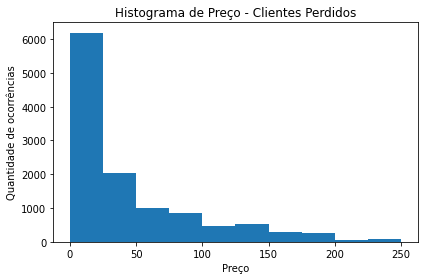

In [ ]:
# plotar o histograma de Preço dos clientes perdidos
#Percebe-se que os clientes perdidos transacionam produtos de baixo valor. Ou seja, entram na plataforma, compram um produto de baixo valor e nunca mais voltam.
fig, ax = plt.subplots()

ax.hist('preco_novo', data=df_trusted_ClientePerdido)
ax.set_title("Histograma de Preço - Clientes Perdidos")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("Preço")

plt.tight_layout()

In [ ]:
#A maior representatividade das transações de clientes perdidos são: aniversario-e-festas, lembrancinhas e decoração.
#Uma estratégia de marketing seria pegar a data que o cliente fez a compra e enviar sugestões na temática que ele buscou na primeira vez. Uma outra possibilidade seria pegar a data de nascimento no cadastro para também enviar sugestão. 
df_trusted_ClientePerdido["category"].value_counts()/df_trusted_ClientePerdido.shape[0]

aniversario-e-festas       0.196735
lembrancinhas              0.181177
decoracao                  0.130590
bebe                       0.096752
casamento                  0.087060
roupas                     0.062659
papel-e-cia                0.054668
infantil                   0.054413
convites                   0.024571
casa                       0.011563
festas                     0.011478
bijuterias                 0.007907
acessorios                 0.007737
religiosos                 0.006121
joias                      0.006121
papel-e-scrapbooking       0.005186
bolsas-e-carteiras         0.005186
tecnicas-de-artesanato     0.004931
patchwork-e-costura        0.004846
armarinho                  0.004676
jogos-e-brinquedos         0.004336
saude-e-beleza             0.003741
doces                      0.003486
pets                       0.003401
aulas-e-cursos             0.003231
mdf-e-madeira              0.003231
bijuterias-e-acessorios    0.002976
embalagens-diversas        0

In [ ]:
df_ClienteBaixoValor=df_trusted_final_segmentado.query('Segmento_Cliente=="Cliente Baixo Valor"')

In [ ]:
df_ClienteBaixoValor.head()

,order_id,product_id,buyer_id,data,category,subcategory,quantidade,preco_novo,faturamento,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Segmento_Cliente
5,8E37B6,77D3D1,512C40,2017-03-01,lembrancinhas,lembrancinhas-em-tubetes,25,35.0,875.0,1015,2,983.00,3.46,61.77,61.77,2.65,Cliente Baixo Valor
6,8E4365,1386D3,52818E,2017-03-01,lembrancinhas,caneca-personalizada,70,69.9,4893.0,1015,2,4962.99,3.46,61.77,61.77,2.65,Cliente Baixo Valor
7,8E169F,8190B8,52CB51,2017-03-01,lembrancinhas,lembrancinhas-de-formatura,100,10.0,1000.0,1015,2,1085.90,3.46,61.77,61.77,2.65,Cliente Baixo Valor
22,8EBF78,50CF2B,39A0C9,2017-06-01,lembrancinhas,lembrancinhas-personalizadas,30,111.9,3357.0,923,2,6040.80,9.86,61.77,61.77,2.70,Cliente Baixo Valor
24,8EC1D6,4491D2,45681F,2017-06-01,aniversario-e-festas,enfeites-de-mesa,50,92.0,4600.0,923,2,4610.99,9.86,61.77,61.77,2.70,Cliente Baixo Valor


In [ ]:
#Verificando a frequência, percebe-se que é um cliente de frequência dupla.
df_ClienteBaixoValor["Frequency"].describe()

count    11768.000000
mean         1.774643
std          0.417835
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Frequency, dtype: float64

In [ ]:
# plotar o histograma da soma da quantidade
#Percebe-se que esse tipo de cliente não compra em grandes quantidades, sendo dois itens comprados na mediana. 
df_ClienteBaixoValor["quantidade"].describe()

count    11768.000000
mean        17.245156
std         33.176534
min          1.000000
25%          1.000000
50%          2.000000
75%         20.000000
max        501.000000
Name: quantidade, dtype: float64

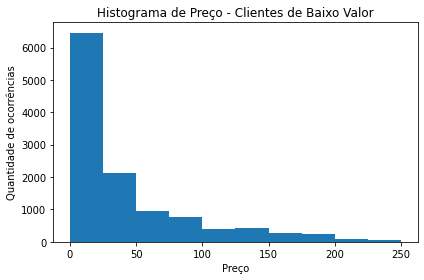

In [ ]:
# plotar o histograma de Preço dos clientes de Baixo Valor
#Percebe-se que os clientes de baixo valor transacionam produtos de baixo valor. Ou seja, entram na plataforma, compram um produto de baixo valor e voltam mais uma vez.
fig, ax = plt.subplots()

ax.hist('preco_novo', data=df_ClienteBaixoValor)
ax.set_title("Histograma de Preço - Clientes de Baixo Valor")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("Preço")

plt.tight_layout()

In [ ]:
#A maior representatividade das transações de clientes de baixo valor são: aniversario-e-festas, lembrancinhas e decoração.
#Uma estratégia de marketing seria pegar a data que o cliente fez a compra e enviar sugestões na temática que ele buscou na primeira vez. Uma outra possibilidade seria pegar a data de nascimento no cadastro para também enviar sugestão. O investimento em marketing para esse cliente pode ser mais útil que o cliente perdido, uma vez que o cliente volta a fazer compra.
df_ClienteBaixoValor["category"].value_counts()/df_ClienteBaixoValor.shape[0]

aniversario-e-festas       0.219918
lembrancinhas              0.203943
decoracao                  0.123215
bebe                       0.101462
casamento                  0.099082
roupas                     0.059653
infantil                   0.051920
papel-e-cia                0.045972
convites                   0.023878
festas                     0.009602
casa                       0.007903
papel-e-scrapbooking       0.004419
acessorios                 0.004334
bijuterias                 0.004079
armarinho                  0.003739
tecnicas-de-artesanato     0.003399
joias                      0.003144
bolsas-e-carteiras         0.002974
religiosos                 0.002974
pets                       0.002804
embalagens-diversas        0.002634
doces                      0.002464
bijuterias-e-acessorios    0.002294
biscuit-e-modelagem        0.002209
mdf-e-madeira              0.001954
patchwork-e-costura        0.001869
aulas-e-cursos             0.001869
saude-e-beleza             0

In [ ]:
df_ClienteMedioValor=df_trusted_final_segmentado.query('Segmento_Cliente=="Cliente Medio Valor"')

In [ ]:
#Verificando a frequência, percebe-se que é um cliente de frequência varia entre 2 e 4 vezes.
df_ClienteMedioValor["Frequency"].describe()


count    16562.000000
mean         2.517812
std          0.573094
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: Frequency, dtype: float64

In [ ]:
#Percebe-se que esse tipo de cliente não compra em grandes quantidades, sendo dois itens comprados na mediana. Existem casos isolados de grande quantidade comprada.
df_ClienteMedioValor["quantidade"].describe()


count    16562.000000
mean        17.154691
std         31.560168
min          1.000000
25%          1.000000
50%          2.000000
75%         21.000000
max        800.000000
Name: quantidade, dtype: float64

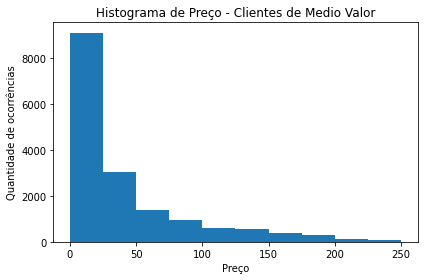

In [ ]:
# plotar o histograma de Preço dos clientes de Baixo Valor
#Percebe-se que os clientes de médio valor transacionam produtos de valor semelhante aos anteriores. Ou seja, entram na plataforma, compram um produto de baixo valor e voltam até outra três vezes.
fig, ax = plt.subplots()

ax.hist('preco_novo', data=df_ClienteMedioValor)
ax.set_title("Histograma de Preço - Clientes de Medio Valor")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("Preço")

plt.tight_layout()


In [ ]:
#A maior representatividade das transações de clientes de baixo valor são: aniversario-e-festas, lembrancinhas e decoração, casamento e bebe.
#Uma estratégia interessante para esse caso seria combinar recomendações atreladas a casamento, bebe e itens para casa. 
df_ClienteMedioValor["category"].value_counts()/df_ClienteMedioValor.shape[0]


aniversario-e-festas       0.244717
lembrancinhas              0.207161
decoracao                  0.109045
casamento                  0.096124
bebe                       0.093648
roupas                     0.060138
infantil                   0.053194
papel-e-cia                0.045043
convites                   0.022823
festas                     0.009721
casa                       0.006159
acessorios                 0.004770
armarinho                  0.004045
bijuterias-e-acessorios    0.003562
embalagens-diversas        0.003562
papel-e-scrapbooking       0.003442
doces                      0.003381
bijuterias                 0.003321
religiosos                 0.002838
mdf-e-madeira              0.002717
tecnicas-de-artesanato     0.002596
patchwork-e-costura        0.002476
bolsas-e-carteiras         0.002355
jogos-e-brinquedos         0.001993
saude-e-beleza             0.001691
pets                       0.001691
joias                      0.001691
aulas-e-cursos             0

In [ ]:
df_ClienteAltoValor=df_trusted_final_segmentado.query('Segmento_Cliente=="Cliente Alto Valor"')

In [ ]:
#Verificando a frequência, percebe-se que é um cliente de mais frequente que o anterior. Na mediana, são clientes que fazem 4 compras na plataforma.
df_ClienteAltoValor["Frequency"].describe()


count    13540.000000
mean         4.639882
std          3.400383
min          3.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         39.000000
Name: Frequency, dtype: float64

In [ ]:
# plotar o histograma da soma da quantidade
#Percebe-se que esse tipo de cliente compra na mediana três itens em uma única compra.
df_ClienteAltoValor["quantidade"].describe()


count    13540.000000
mean        17.617282
std         30.831391
min          1.000000
25%          1.000000
50%          3.000000
75%         25.000000
max        701.000000
Name: quantidade, dtype: float64

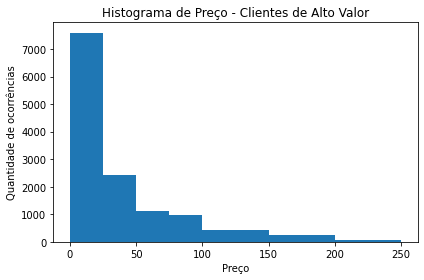

In [ ]:
# plotar o histograma de Preço dos clientes de Alto Valor
#Percebe-se que os clientes de alto valor transacionam produtos de baixo valor, mas com maior ocorrência - o que sugere que são clientes elásticos ao preço. 
fig, ax = plt.subplots()

ax.hist('preco_novo', data=df_ClienteAltoValor)
ax.set_title("Histograma de Preço - Clientes de Alto Valor")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("Preço")

plt.tight_layout()


In [ ]:
#A maior representatividade das transações de clientes de baixo valor são: aniversario-e-festas, lembrancinhas e decoração, bebe, casamento e infantil.
#Uma estratégia interessante para esse caso seria combinar recomendações atreladas a casamento, bebe e itens para casa e crianças (brinquedos, etc.).
df_ClienteAltoValor["category"].value_counts()/df_ClienteAltoValor.shape[0]


aniversario-e-festas       0.296233
lembrancinhas              0.204579
decoracao                  0.104505
bebe                       0.097932
casamento                  0.093279
infantil                   0.045790
papel-e-cia                0.045273
roupas                     0.038331
convites                   0.018316
festas                     0.007533
armarinho                  0.005244
casa                       0.004948
tecnicas-de-artesanato     0.004874
doces                      0.004505
patchwork-e-costura        0.003323
acessorios                 0.003176
embalagens-diversas        0.002880
papel-e-scrapbooking       0.002806
bijuterias-e-acessorios    0.002733
saude-e-beleza             0.001846
mdf-e-madeira              0.001846
religiosos                 0.001625
bolsas-e-carteiras         0.001477
jogos-e-brinquedos         0.001329
bijuterias                 0.001329
biscuit-e-modelagem        0.001256
aulas-e-cursos             0.000591
pets                       0

In [ ]:
df_ClienteTopValor=df_trusted_final_segmentado.query('Segmento_Cliente=="Cliente Top"')

In [ ]:
#Verificando a frequência, percebe-se que é um cliente que compra com mais frequência. Na média, compra sete vezes, podendo chegar a 34.
df_ClienteTopValor["Frequency"].describe()


count    7035.000000
mean        6.594883
std         4.098923
min         4.000000
25%         5.000000
50%         5.000000
75%         7.000000
max        34.000000
Name: Frequency, dtype: float64

In [ ]:
#Percebe-se que esse tipo de cliente compra em maior quantidade que os grupos anteriores. 
df_ClienteTopValor["quantidade"].describe()


count    7035.000000
mean       15.550391
std        27.271242
min         1.000000
25%         1.000000
50%         2.000000
75%        20.000000
max       600.000000
Name: quantidade, dtype: float64

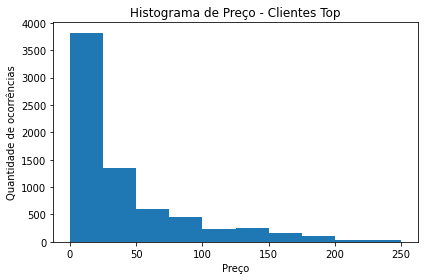

In [ ]:
# plotar o histograma de Preço dos clientes de Baixo Valor
#Percebe-se que os clientes top transacionam produtos de baixo valor e valores moderados, sendo os casos de alto valor pontuais. Ou seja, entram na plataforma, compram um produto de baixo ou médio valor e voltam outras vezes.
fig, ax = plt.subplots()

ax.hist('preco_novo', data=df_ClienteTopValor)
ax.set_title("Histograma de Preço - Clientes Top")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("Preço")

plt.tight_layout()


In [ ]:
#A maior representatividade das transações de clientes top são: aniversario-e-festas, lembrancinhas, decoração, bebe, casaento, roupas.
#Uma estratégia de marketing seria pegar a data que o cliente fez a compra e enviar sugestões na temática que ele buscou nas vezes anteriores, uma vez que é um cliente mais engajado e que compra mais. O investimento em marketing para esse cliente pode ser mais útil que os cliente perdido e baixo valor, uma vez que o cliente volta a fazer compra.
df_ClienteTopValor["category"].value_counts()/df_ClienteTopValor.shape[0]


aniversario-e-festas       0.290263
lembrancinhas              0.189339
decoracao                  0.123241
bebe                       0.105757
casamento                  0.077612
roupas                     0.046766
infantil                   0.045487
papel-e-cia                0.042502
convites                   0.012793
festas                     0.007960
saude-e-beleza             0.007107
acessorios                 0.006823
patchwork-e-costura        0.005970
bijuterias-e-acessorios    0.005402
casa                       0.005402
armarinho                  0.004691
embalagens-diversas        0.002843
doces                      0.002559
papel-e-scrapbooking       0.002559
pets                       0.002274
tecnicas-de-artesanato     0.002132
religiosos                 0.001564
biscuit-e-modelagem        0.001564
mdf-e-madeira              0.001279
jogos-e-brinquedos         0.001137
bolsas-e-carteiras         0.001137
bijuterias                 0.000995
joias                      0

In [ ]:
#Qual é o melhor segmento?
#O cliente alto valor é o melhor, uma vez que trasacionam com mais frequência, compram em maiores quantidades e praticam preços baixos e moderados. Além disso, percebe-se semelhança na temática de compra.

In [ ]:
#Calculando o LTV
orders_df = df_trusted_final.groupby(['buyer_id', 'order_id']).agg({
    'faturamento': sum,
    'data': max
})

orders_df.head()

faturamento       data
buyer_id order_id                        
10044F   ACC680         650.00 2017-04-06
         ACE8A7        1548.00 2017-05-06
1007D2   C90598           9.99 2017-10-23
         F40662          69.90 2018-03-06
1008C4   D3D327          23.00 2017-12-16

In [ ]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [ ]:
summary_df = orders_df.reset_index().groupby('buyer_id').agg({
    'faturamento': [min, max, sum, groupby_mean, groupby_count],
    'data': [min, max, purchase_duration, avg_frequency]
})

summary_df.head()

faturamento                                        data             \
                 min     max      sum       avg count        min        max   
buyer_id                                                                      
10044F        650.00  1548.0  2198.00  1099.000     2 2017-04-06 2017-05-06   
1007D2          9.99    69.9    79.89    39.945     2 2017-10-23 2018-03-06   
1008C4         23.00    23.0    23.00    23.000     1 2017-12-16 2017-12-16   
100933         20.00   199.0   219.00   109.500     2 2018-02-10 2018-10-05   
1009CA          6.80  1875.0  3545.70   709.140     5 2017-04-28 2018-05-07   

                                               
         purchase_duration purchase_frequency  
buyer_id                                       
10044F                  30               15.0  
1007D2                 134               67.0  
1008C4                   0                0.0  
100933                 237              118.5  
1009CA                 374               74.8

In [ ]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]
summary_df = summary_df.reset_index()
summary_df.head()

,buyer_id,faturamento_min,faturamento_max,faturamento_sum,faturamento_avg,faturamento_count,data_min,data_max,data_purchase_duration,data_purchase_frequency
0,10044F,650.00,1548.0,2198.00,1099.000,2,2017-04-06,2017-05-06,30,15.0
1,1007D2,9.99,69.9,79.89,39.945,2,2017-10-23,2018-03-06,134,67.0
2,1008C4,23.00,23.0,23.00,23.000,1,2017-12-16,2017-12-16,0,0.0
3,100933,20.00,199.0,219.00,109.500,2,2018-02-10,2018-10-05,237,118.5
4,1009CA,6.80,1875.0,3545.70,709.140,5,2017-04-28,2018-05-07,374,74.8


In [ ]:
summary_df = summary_df.loc[summary_df['data_purchase_duration'] > 0]
summary_df.shape

(12214, 10)

In [ ]:
summary_df.head()

,buyer_id,faturamento_min,faturamento_max,faturamento_sum,faturamento_avg,faturamento_count,data_min,data_max,data_purchase_duration,data_purchase_frequency
0,10044F,650.00,1548.0,2198.00,1099.000,2,2017-04-06,2017-05-06,30,15.0
1,1007D2,9.99,69.9,79.89,39.945,2,2017-10-23,2018-03-06,134,67.0
3,100933,20.00,199.0,219.00,109.500,2,2018-02-10,2018-10-05,237,118.5
4,1009CA,6.80,1875.0,3545.70,709.140,5,2017-04-28,2018-05-07,374,74.8
8,1014C9,3.75,9.9,13.65,6.825,2,2018-12-10,2019-11-21,346,173.0


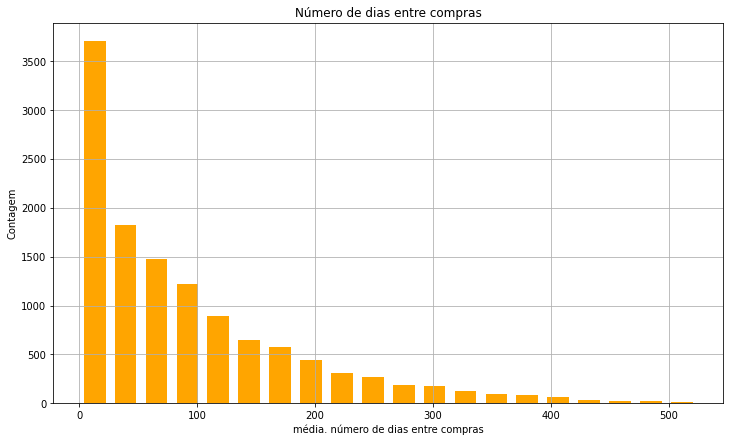

In [ ]:
ax = summary_df['data_purchase_frequency'].hist(
    bins=20,
    color='orange',
    rwidth=0.7,
    figsize=(12,7)
)

ax.set_xlabel('média. número de dias entre compras')
ax.set_ylabel('Contagem')
plt.title('Número de dias entre compras')

plt.show()

In [ ]:
#O tempo médio de recompra é de 91 dias. Contudo, o desvio padrão geral é alto, sendo a mediana 62 dias.
summary_df["data_purchase_frequency"].describe()

count    12214.000000
mean        91.348551
std         94.456014
min          0.142857
25%         18.000000
50%         61.666667
75%        132.333333
max        524.000000
Name: data_purchase_frequency, dtype: float64

In [ ]:
rfm_df.head()

,buyer_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Segmento_Cliente
0,10044F,949,2,2198.00,7.88,61.77,61.77,2.68,Cliente Baixo Valor
1,1007D2,645,2,79.89,32.24,61.77,61.77,2.87,Cliente Baixo Valor
2,1008C4,725,1,23.00,26.50,23.61,23.61,1.20,Cliente Perdido
3,100933,432,2,219.00,50.45,61.77,61.77,3.00,Cliente Baixo Valor
4,1009CA,583,5,3545.70,37.16,96.19,96.19,4.37,Cliente Alto Valor


In [ ]:
rfm_df.shape

(30523, 9)

In [ ]:
df_trusted_recompra_segmento=pd.merge(summary_df, 
                     rfm_df, 
                     on ='buyer_id', 
                     how ='left')
df_trusted_recompra_segmento.head()

,buyer_id,faturamento_min,faturamento_max,faturamento_sum,faturamento_avg,faturamento_count,data_min,data_max,data_purchase_duration,data_purchase_frequency,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Segmento_Cliente
0,10044F,650.00,1548.0,2198.00,1099.000,2,2017-04-06,2017-05-06,30,15.0,949,2,2198.00,7.88,61.77,61.77,2.68,Cliente Baixo Valor
1,1007D2,9.99,69.9,79.89,39.945,2,2017-10-23,2018-03-06,134,67.0,645,2,79.89,32.24,61.77,61.77,2.87,Cliente Baixo Valor
2,100933,20.00,199.0,219.00,109.500,2,2018-02-10,2018-10-05,237,118.5,432,2,219.00,50.45,61.77,61.77,3.00,Cliente Baixo Valor
3,1009CA,6.80,1875.0,3545.70,709.140,5,2017-04-28,2018-05-07,374,74.8,583,5,3545.70,37.16,96.19,96.19,4.37,Cliente Alto Valor
4,1014C9,3.75,9.9,13.65,6.825,2,2018-12-10,2019-11-21,346,173.0,20,2,13.65,96.76,61.77,61.77,3.35,Cliente Medio Valor


In [ ]:
df_cliente_alto_valor=df_trusted_recompra_segmento.loc[df_trusted_recompra_segmento['Segmento_Cliente'] == "Cliente Alto Valor"]
df_cliente_alto_valor["data_purchase_frequency"].mean()

90.93002532484128

In [ ]:
df_cliente_Medio_valor=df_trusted_recompra_segmento.loc[df_trusted_recompra_segmento['Segmento_Cliente'] == "Cliente Medio Valor"]
df_cliente_Medio_valor["data_purchase_frequency"].mean()

104.53414610452691

In [ ]:
df_cliente_baixo_valor=df_trusted_recompra_segmento.loc[df_trusted_recompra_segmento['Segmento_Cliente'] == "Cliente Baixo Valor"]
df_cliente_baixo_valor["data_purchase_frequency"].mean()

60.99114103472714

In [ ]:
df_cliente_top_valor=df_trusted_recompra_segmento.loc[df_trusted_recompra_segmento['Segmento_Cliente'] == "Cliente Top"]
df_cliente_top_valor["data_purchase_frequency"].mean()

107.2187039458046

In [ ]:
df_trusted_recompra_segmento["LTV"]=(df_trusted_recompra_segmento["faturamento_sum"]*df_trusted_recompra_segmento["data_purchase_duration"])/365

In [ ]:
df_trusted_recompra_segmento.head()

,buyer_id,faturamento_min,faturamento_max,faturamento_sum,faturamento_avg,faturamento_count,data_min,data_max,data_purchase_duration,data_purchase_frequency,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Segmento_Cliente,LTV
0,10044F,650.00,1548.0,2198.00,1099.000,2,2017-04-06,2017-05-06,30,15.0,949,2,2198.00,7.88,61.77,61.77,2.68,Cliente Baixo Valor,180.657534
1,1007D2,9.99,69.9,79.89,39.945,2,2017-10-23,2018-03-06,134,67.0,645,2,79.89,32.24,61.77,61.77,2.87,Cliente Baixo Valor,29.329479
2,100933,20.00,199.0,219.00,109.500,2,2018-02-10,2018-10-05,237,118.5,432,2,219.00,50.45,61.77,61.77,3.00,Cliente Baixo Valor,142.200000
3,1009CA,6.80,1875.0,3545.70,709.140,5,2017-04-28,2018-05-07,374,74.8,583,5,3545.70,37.16,96.19,96.19,4.37,Cliente Alto Valor,3633.128219
4,1014C9,3.75,9.9,13.65,6.825,2,2018-12-10,2019-11-21,346,173.0,20,2,13.65,96.76,61.77,61.77,3.35,Cliente Medio Valor,12.939452


In [ ]:
df_trusted_recompra_segmento["LTV"].mean()

820.668660221484

In [ ]:
df_cliente_alto_valor_ltv=df_trusted_recompra_segmento.loc[df_trusted_recompra_segmento['Segmento_Cliente'] == "Cliente Alto Valor"]
df_cliente_alto_valor_ltv["LTV"].mean()

1201.6465153439963

In [ ]:
df_cliente_medio_valor_ltv=df_trusted_recompra_segmento.loc[df_trusted_recompra_segmento['Segmento_Cliente'] == "Cliente Medio Valor"]
df_cliente_medio_valor_ltv["LTV"].mean()

531.4722160801211

In [ ]:
df_cliente_baixo_valor_ltv=df_trusted_recompra_segmento.loc[df_trusted_recompra_segmento['Segmento_Cliente'] == "Cliente Baixo Valor"]
df_cliente_baixo_valor_ltv["LTV"].mean()

226.24788859547783

In [ ]:
df_cliente_Top_valor_ltv=df_trusted_recompra_segmento.loc[df_trusted_recompra_segmento['Segmento_Cliente'] == "Cliente Top"]
df_cliente_Top_valor_ltv["LTV"].mean()

2490.0812246028313

In [ ]:
df_trusted_final.head()

,order_id,product_id,buyer_id,data,category,subcategory,quantidade,preco_novo,faturamento
41,8E0919,75D1EE,1E5890,2017-02-01,casamento,convites-de-casamento,30,37.6,1128.0
51,8E0EE1,81DA79,3A2F36,2017-02-01,aniversario-e-festas,convites-de-aniversario-infantil,35,60.0,2100.0
52,8DFD9C,202FBD,4067B4,2017-02-01,aniversario-e-festas,lembrancinhas-de-aniversario-infantil,70,20.0,1400.0
81,8DF7B6,7CFCB7,52C8B8,2017-02-01,casamento,noivinhos,110,42.0,4620.0
118,8E169B,55904C,393592,2017-03-01,lembrancinhas,rotulos-personalizados,10,80.0,800.0


In [ ]:
df_trusted_basket=df_trusted_final.loc[df_trusted_final['quantidade']>0]

In [ ]:
basket = df_trusted_basket[df_trusted_basket['quantidade'] >0]\
        .groupby(['buyer_id', 'category'])["quantidade"]\
        .sum().unstack()\
        .reset_index().fillna(0)\
        .set_index("buyer_id")

In [ ]:
basket.head()

category,acessorios,aniversario-e-festas,armarinho,aulas-e-cursos,bebe,bijuterias,bijuterias-e-acessorios,biscuit-e-modelagem,bolsas-e-carteiras,bordado,...,pets,pintura-artistica,pintura-em-tecido,religiosos,roupas,saboaria,saude-e-beleza,tecnicas-de-artesanato,trico-e-croche,velas
buyer_id,,,,,,,,,,,,,,,,,,,,,
10044F,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1007D2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1008C4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100933,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1009CA,0.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Diferenciar 0 para um item não comprado de um item comprado (1)
def enconde_units(x): 
  if x <= 0:
    return 0
  if x >=1: 
    return 1

In [ ]:
basket_encode=basket.applymap(enconde_units)
basket_encode

category,acessorios,aniversario-e-festas,armarinho,aulas-e-cursos,bebe,bijuterias,bijuterias-e-acessorios,biscuit-e-modelagem,bolsas-e-carteiras,bordado,...,pets,pintura-artistica,pintura-em-tecido,religiosos,roupas,saboaria,saude-e-beleza,tecnicas-de-artesanato,trico-e-croche,velas
buyer_id,,,,,,,,,,,,,,,,,,,,,
10044F,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1007D2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1008C4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100933,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009CA,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FF67E,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FF914,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FF971,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
basket_filter=basket_encode[(basket_encode > 0).sum(axis=1)>=2]

In [ ]:
basket_filter

category,acessorios,aniversario-e-festas,armarinho,aulas-e-cursos,bebe,bijuterias,bijuterias-e-acessorios,biscuit-e-modelagem,bolsas-e-carteiras,bordado,...,pets,pintura-artistica,pintura-em-tecido,religiosos,roupas,saboaria,saude-e-beleza,tecnicas-de-artesanato,trico-e-croche,velas
buyer_id,,,,,,,,,,,,,,,,,,,,,
100933,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009CA,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012AF,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1014C9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10150D,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FEBCF,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FF2A5,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FF5F8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#O apriori serve para encontrar os itens mais frequentes.
from mlxtend.frequent_patterns import apriori

In [ ]:
frequent_itemsets=apriori(basket_filter,min_support=0.03,use_colnames=True).sort_values('support',ascending=False).reset_index(drop=True)

frequent_itemsets['lenght']=frequent_itemsets['itemsets'].apply(lambda x: len(x))

frequent_itemsets

,support,itemsets,lenght
0,0.511146,(lembrancinhas),1
1,0.507871,(aniversario-e-festas),1
2,0.271844,"(aniversario-e-festas, lembrancinhas)",2
3,0.208452,(decoracao),1
4,0.206022,(bebe),1
5,0.167987,(casamento),1
6,0.145906,(infantil),1
7,0.108716,(papel-e-cia),1
8,0.107448,(roupas),1
9,0.073111,"(lembrancinhas, bebe)",2


In [ ]:
from mlxtend.frequent_patterns import association_rules

In [ ]:
df_basket_antecedent_consequent=association_rules(frequent_itemsets, metric='lift',
                  min_threshold=1).sort_values('lift',ascending=False).reset_index(drop=True)

In [ ]:
#Itens com categorias bebe e infantil são os que apresentam um valor de elevação maior (lift), portanto os que tem maior associação de compra.
#Aniversários-festas e lembrancinhas também apresentam alta associação. 
#Também existe associação entre as demais categorias, dado que o lift >1.
#Contudo, ao verificar o índice 'confidence', identificamos que as maiores forças da antecedente sobre a consequente está em aniversario-festas e lembrancinhas e vice-versa. Mas nos demais também existe a influência declarada abaixo.
df_basket_antecedent_consequent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bebe),(infantil),0.206022,0.145906,0.032118,0.155897,1.068479,0.002058,1.011837
1,(infantil),(bebe),0.145906,0.206022,0.032118,0.220130,1.068479,0.002058,1.018090
2,(aniversario-e-festas),(lembrancinhas),0.507871,0.511146,0.271844,0.535261,1.047178,0.012247,1.051889
3,(lembrancinhas),(aniversario-e-festas),0.511146,0.507871,0.271844,0.531831,1.047178,0.012247,1.051179
4,(decoracao),(bebe),0.208452,0.206022,0.044480,0.213381,1.035717,0.001534,1.009355
5,(bebe),(decoracao),0.206022,0.208452,0.044480,0.215897,1.035717,0.001534,1.009495


In [ ]:
#A partir de agora, faremos a mesma coisa para as subcategorias
df_trusted_basket_sub=df_trusted_final.loc[df_trusted_final['quantidade']>0]

In [ ]:
basket_sub = df_trusted_basket_sub[df_trusted_basket_sub['quantidade'] >0]\
        .groupby(['buyer_id', 'subcategory'])["quantidade"]\
        .sum().unstack()\
        .reset_index().fillna(0)\
        .set_index("buyer_id")

In [ ]:
basket_sub.head()

subcategory,abajur,abajur-infantil,acessorios-para-noiva,adesivo,adesivo-para-notebook,adesivos-de-geladeira,adesivos-de-parede,agenda,agulha,album,...,vela-para-festa,velas-personalizadas,vestido,vestido-infantil,vestido-pet,vidros-decorados,vitral,xale,zen,ziper
buyer_id,,,,,,,,,,,,,,,,,,,,,
10044F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1007D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1008C4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1009CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Diferenciar 0 para um item não comprado de um item comprado (1)
def enconde_units(x): 
  if x <= 0:
    return 0
  if x >=1: 
    return 1

In [ ]:
basket_encode_sub=basket_sub.applymap(enconde_units)
basket_encode_sub

subcategory,abajur,abajur-infantil,acessorios-para-noiva,adesivo,adesivo-para-notebook,adesivos-de-geladeira,adesivos-de-parede,agenda,agulha,album,...,vela-para-festa,velas-personalizadas,vestido,vestido-infantil,vestido-pet,vidros-decorados,vitral,xale,zen,ziper
buyer_id,,,,,,,,,,,,,,,,,,,,,
10044F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1007D2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1008C4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FF67E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FF914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FF971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
basket_filter_sub=basket_encode[(basket_encode_sub > 0).sum(axis=1)>=2]

In [ ]:
basket_filter_sub.head()

category,acessorios,aniversario-e-festas,armarinho,aulas-e-cursos,bebe,bijuterias,bijuterias-e-acessorios,biscuit-e-modelagem,bolsas-e-carteiras,bordado,...,pets,pintura-artistica,pintura-em-tecido,religiosos,roupas,saboaria,saude-e-beleza,tecnicas-de-artesanato,trico-e-croche,velas
buyer_id,,,,,,,,,,,,,,,,,,,,,
1007D2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100933,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009CA,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012AF,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1014C9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
frequent_itemsets_sub=apriori(basket_filter_sub,min_support=0.03,use_colnames=True).sort_values('support',ascending=False).reset_index(drop=True)

frequent_itemsets_sub['lenght']=frequent_itemsets_sub['itemsets'].apply(lambda x: len(x))

frequent_itemsets_sub

,support,itemsets,lenght
0,0.472063,(aniversario-e-festas),1
1,0.433040,(lembrancinhas),1
2,0.207208,"(aniversario-e-festas, lembrancinhas)",2
3,0.185762,(bebe),1
4,0.185762,(decoracao),1
5,0.157543,(casamento),1
6,0.115375,(infantil),1
7,0.089575,(roupas),1
8,0.088446,(papel-e-cia),1
9,0.055309,"(lembrancinhas, bebe)",2


In [ ]:
df_basket_antecedent_consequent_sub=association_rules(frequent_itemsets_sub, metric='lift',
                  min_threshold=1).sort_values('lift',ascending=False).reset_index(drop=True)

In [ ]:
#Itens com subcategorias aniversario-festas e lembrancinhas são os que apresentam um valor de elevação maior (lift), portanto os que tem maior associação de compra.
# Quanto a direção de compra, primeiro compra lembrancinha, depois itens de aniversario-e-festas.
df_basket_antecedent_consequent_sub

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aniversario-e-festas),(lembrancinhas),0.472063,0.433040,0.207208,0.438941,1.013626,0.002785,1.010517
1,(lembrancinhas),(aniversario-e-festas),0.433040,0.472063,0.207208,0.478496,1.013626,0.002785,1.012334


In [ ]:
#Recomendação de compra para cada cliente por categoria
df_basket_antecedent_consequent.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bebe),(infantil),0.206022,0.145906,0.032118,0.155897,1.068479,0.002058,1.011837
1,(infantil),(bebe),0.145906,0.206022,0.032118,0.220130,1.068479,0.002058,1.018090
2,(aniversario-e-festas),(lembrancinhas),0.507871,0.511146,0.271844,0.535261,1.047178,0.012247,1.051889
3,(lembrancinhas),(aniversario-e-festas),0.511146,0.507871,0.271844,0.531831,1.047178,0.012247,1.051179
4,(decoracao),(bebe),0.208452,0.206022,0.044480,0.213381,1.035717,0.001534,1.009355


In [ ]:
#Recomendação de compra para cada cliente por subcategoria
df_basket_antecedent_consequent_sub.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aniversario-e-festas),(lembrancinhas),0.472063,0.433040,0.207208,0.438941,1.013626,0.002785,1.010517
1,(lembrancinhas),(aniversario-e-festas),0.433040,0.472063,0.207208,0.478496,1.013626,0.002785,1.012334
